<a href="https://colab.research.google.com/github/SamilG2/challenge-alurastore-datascience/blob/main/Solution_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Sumar los precios de las ventas para cada tienda
fact_tienda1 = tienda['Precio'].astype(float).sum()
fact_tienda2 = tienda2['Precio'].astype(float).sum()
fact_tienda3 = tienda3['Precio'].astype(float).sum()
fact_tienda4 = tienda4['Precio'].astype(float).sum()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [fact_tienda1, fact_tienda2, fact_tienda3, fact_tienda4]

# Resultados
print(f"Facturación de la Tienda 1: ${fact_tienda1:,.2f}")
print(f"Facturación de la Tienda 2: ${fact_tienda2:,.2f}")
print(f"Facturación de la Tienda 3: ${fact_tienda3:,.2f}")
print(f"Facturación de la Tienda 4: ${fact_tienda4:,.2f}")

# Facturación total de todas las tiendas
fact_total = fact_tienda1 + fact_tienda2 + fact_tienda3 + fact_tienda4
print("\nFacturación total de todas las tiendas:", fact_total)

Facturación de la Tienda 1: $1,150,880,400.00
Facturación de la Tienda 2: $1,116,343,500.00
Facturación de la Tienda 3: $1,098,019,600.00
Facturación de la Tienda 4: $1,038,375,700.00

Facturación total de todas las tiendas: 4403619200.0


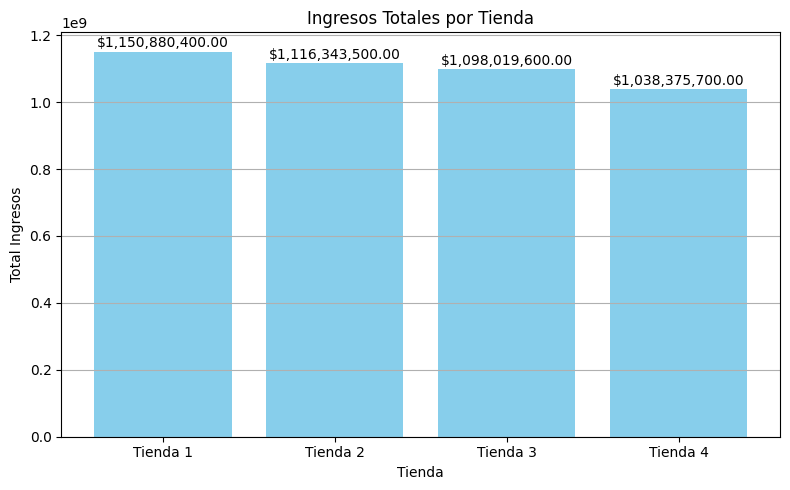

In [3]:
import matplotlib.pyplot as plt
# Grafico de barras para Total de ingresos
plt.figure(figsize=(8,5))
barras = plt.bar(tiendas, facturas, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos')
plt.xlabel('Tienda')
plt.grid(axis='y')
for barra, valor in zip(barras, facturas):
    plt.annotate(f'${valor:,.2f}',
                 xy=(barra.get_x() + barra.get_width() / 2, valor),
                 xytext=(0, 1),
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [4]:
# Función para calcular/mostrar la cantidad de productos
# vendidos por categoría de una tienda
def productos_por_categoria(tienda, numero):
    cantidad = tienda.groupby('Categoría del Producto')['Precio'].count()
    print(f"\nCantidad de productos vendidos por categoría en la Tienda {numero}:")
    print(cantidad.sort_values(ascending=False))

# Resultados para cada tienda
productos_por_categoria(tienda, 1)
productos_por_categoria(tienda2, 2)
productos_por_categoria(tienda3, 3)
productos_por_categoria(tienda4, 4)


Cantidad de productos vendidos por categoría en la Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Precio, dtype: int64

Cantidad de productos vendidos por categoría en la Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Precio, dtype: int64

Cantidad de productos vendidos por categoría en la Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos

# 3. Calificación promedio de la tienda


In [5]:
def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificación'].mean()
    print(f"Clasificación promedio en Tienda {numero}: {promedio:.2f}")

# Mostrar resultados para cada tienda
clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificación promedio en Tienda 1: 3.98
Clasificación promedio en Tienda 2: 4.04
Clasificación promedio en Tienda 3: 4.05
Clasificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos

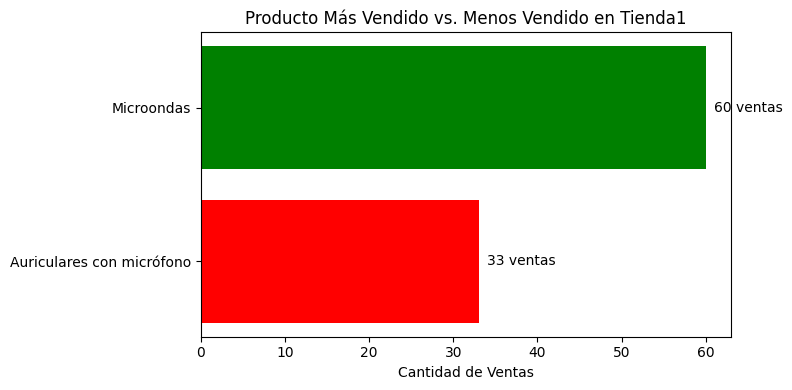

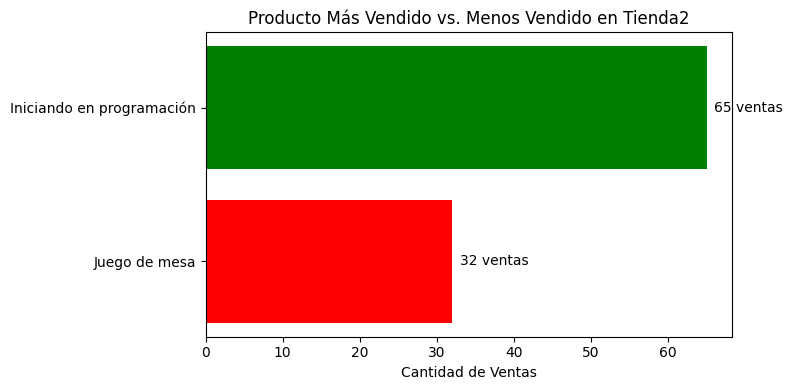

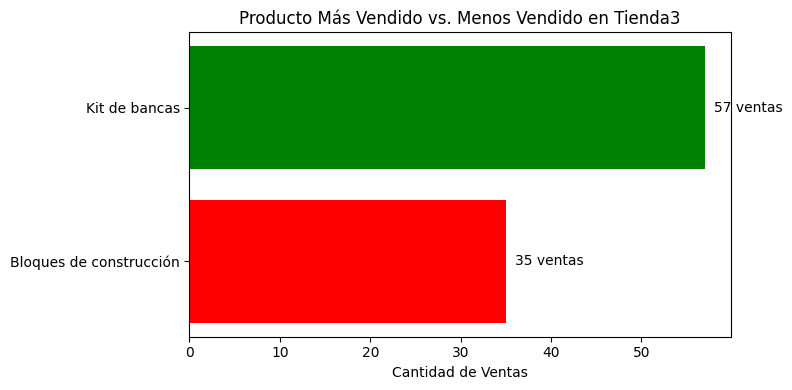

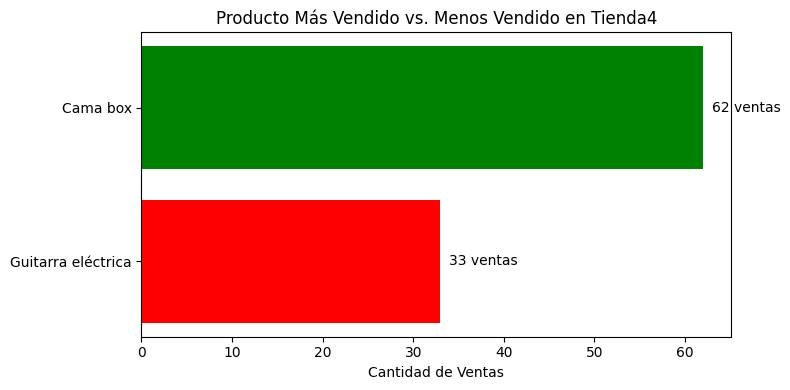

In [6]:
import matplotlib.pyplot as plt

# Funciones para obtener producto más y menos vendido por tienda
def producto_masmenosvendido(tienda, numero):
    conteo_productos = tienda['Producto'].value_counts()

    # Verifica el producto más vendido
    producto_mas = conteo_productos.idxmax()
    ventas_mas = conteo_productos.max()

    # Verifica el producto menos vendido
    producto_menos = conteo_productos.idxmin()
    ventas_menos = conteo_productos.min()

    # Visualización
    productos = [producto_menos, producto_mas]
    ventas = [ventas_menos, ventas_mas]
    colores = ['red', 'green']

    plt.figure(figsize=(8, 4))
    barras = plt.barh(productos, ventas, color=colores)
    plt.title(f"Producto Más Vendido vs. Menos Vendido en Tienda{numero}")
    plt.xlabel("Cantidad de Ventas")

    for barra, venta in zip(barras, ventas):
        plt.text(venta + 1, barra.get_y() + barra.get_height()/2,
                 f"{venta} ventas", va='center')

    plt.tight_layout()
    plt.show()

# Resultados para cada tienda
producto_masmenosvendido(tienda, 1)
producto_masmenosvendido(tienda2, 2)
producto_masmenosvendido(tienda3, 3)
producto_masmenosvendido(tienda4, 4)


# 5. Envío promedio por tienda

In [7]:
# Lista de DataFrames por tienda
tiendas_df = [tienda, tienda2, tienda3, tienda4]
nombres_tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Lista para guardar los promedios
promedios_envio = []

# Calcular promedio de envío por tienda
for i, datos_tienda in enumerate(tiendas_df, start=1):
    promedio = datos_tienda['Costo de envío'].mean()
    print(f"{nombres_tienda[i-1]} - Envío promedio: ${promedio:.2f}")
    promedios_envio.append(promedio)

Tienda 1 - Envío promedio: $26018.61
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


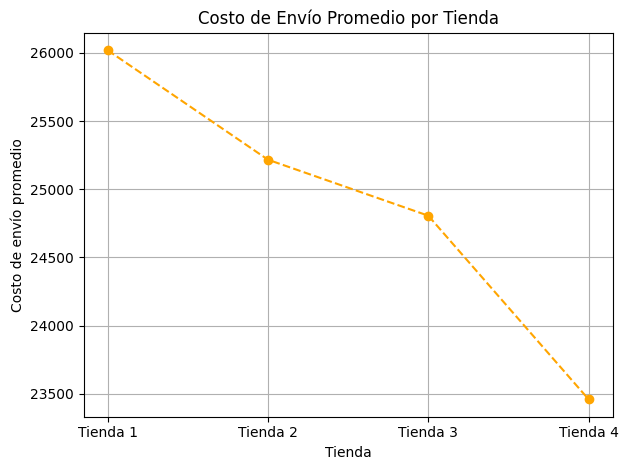

In [8]:
import matplotlib.pyplot as plt

plt.plot(nombres_tienda, promedios_envio, marker='o', linestyle='--', color='orange')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.grid(True)
plt.tight_layout()
plt.show()
